# Identifiability Analysis
Now that we have chosen the SCB model with proportional error, let's verify the identifiability of its parameters. This notebook computes the profile for each parameter of the model. Its last cells compute their confidence interval, and plot the PL curves for all parameters.

In [1]:
from jupyterthemes import get_themes
from jupyterthemes.stylefx import set_nb_theme

def update_theme(change):
    """ display chosen theme from dropdown menu """
    name = change['new']
    html_css = set_nb_theme(name)
    display(html_css)

themes = get_themes()
print(themes)
set_nb_theme(themes[2])

['chesterish', 'grade3', 'oceans16', 'onedork']


In [2]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from matplotlib import rc
from matplotlib.ticker import FormatStrFormatter
%matplotlib inline

rc('text', usetex=False)
rc('font', **{'family': 'sans-serif', 'sans-serif':'DejaVu Sans'})
rc('mathtext', **{'fontset': 'custom', 'rm':'DejaVu Sans', 'it':'DejaVu Sans:italic', 'bf':'DejaVu Sans:bold'})

In [3]:
from imp import reload
import numpy as np
from scipy.stats import chi2
import SCB_estimate as SCBe
import Error_Model as EM
import Custom_Estimation_Routines as CER
import Selection_Criteria as SC
import Profile_Likelihood as PL
reload(CER)
reload(PL)

data = '../data/Cell_counts_DMSO.csv'  #path to dataset
duration = 5                           #how many timepoints should we consider in the estimation

DMSO_data = np.genfromtxt(data)
DMSO_data = DMSO_data[:,:duration]
t=np.arange(duration)

Parameters_proportional=np.loadtxt('../data/02_Error_Model_Selection/Proportional_Error_%id.params'%(duration-1))
rhoS,deltaSC,b1,rhoC,deltaCB,rhoB,b2=Parameters_proportional

In [6]:
PLrhoS=PL.Compute_Profile(np.array([rhoS,b1]),
                          0,
                          EM.logLikelihood_ProportionalError,
                          (DMSO_data[0,:duration],SCBe.S,t,DMSO_data[0,0]), ((None,None),(0, None)),
                            target_sample_size=100,
                            max_sample_size=500,
                            d_par_init=0.1,
                            max_step=3)

Computing point #0 of the profile
Computing point #1 of the profile
Computing point #2 of the profile
Computing point #3 of the profile
Computing point #4 of the profile
Computing point #5 of the profile
Computing point #6 of the profile
Computing point #7 of the profile
Computing point #8 of the profile
Computing point #9 of the profile
Computing point #10 of the profile
Computing point #11 of the profile
Computing point #12 of the profile
Computing point #13 of the profile
Computing point #14 of the profile
Computing point #15 of the profile
Computing point #16 of the profile
Computing point #17 of the profile
Computing point #18 of the profile
Computing point #19 of the profile
Computing point #20 of the profile
Computing point #21 of the profile
Computing point #22 of the profile
Computing point #23 of the profile
Computing point #24 of the profile
Computing point #25 of the profile
Computing point #26 of the profile
Computing point #27 of the profile
Computing point #28 of the pro

In [4]:
save=False
if save:
    data=np.vstack((PLrhoS['Parameters'],PLrhoS['Profile_Likelihood']))
    np.savetxt('../data/03_Identifiability_Analysis/rhoS_%id.profile'%(duration-1),data)

load=True
if load:
    data=np.genfromtxt('../data/03_Identifiability_Analysis/rhoS_%id.profile'%(duration-1))
    PLrhoS={'Parameters':data[:-1],'Profile_Likelihood':data[-1]}

/Users/rduchesn/Library/Python/3.5/lib/python/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


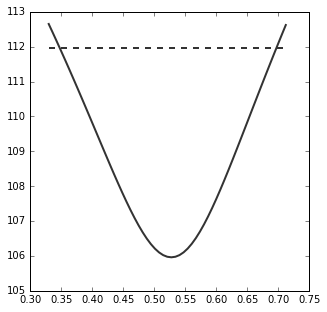

In [5]:
plt.rcParams['figure.figsize'] = 5,5

threshold=chi2.ppf(0.95,2)
f, ax =plt.subplots()
#plt.semilogx(RhoS,PLrhoS,linewidth=2,c='0.2')
plt.plot([PLrhoS['Parameters'][0,0],PLrhoS['Parameters'][0,-1]],[np.min(PLrhoS['Profile_Likelihood'])+threshold,np.min(PLrhoS['Profile_Likelihood'])+threshold],'--',c='0.2',linewidth=2)
plt.plot(PLrhoS['Parameters'][0],PLrhoS['Profile_Likelihood'],'-',c='0.2',linewidth=2)

In [9]:
PLb1=PL.Compute_Profile(np.array([rhoS,b1]),
                            1,
                            EM.logLikelihood_ProportionalError,
                            (DMSO_data[0,:duration],SCBe.S,t,DMSO_data[0,0]),
                            [(None, None),(0,None)],
                            target_sample_size=100,
                            max_sample_size=500,
                            d_par_init=0.1,
                            max_step=3)

Computing point #0 of the profile
Computing point #1 of the profile
Computing point #2 of the profile
Computing point #3 of the profile
Computing point #4 of the profile
Computing point #5 of the profile
Computing point #6 of the profile
Computing point #7 of the profile
Computing point #8 of the profile
Computing point #9 of the profile
Computing point #10 of the profile
Computing point #11 of the profile
Computing point #12 of the profile
Computing point #13 of the profile
Computing point #14 of the profile
Computing point #15 of the profile
Computing point #16 of the profile
Computing point #17 of the profile
Computing point #18 of the profile
Computing point #19 of the profile
Computing point #20 of the profile
Computing point #21 of the profile
Computing point #22 of the profile
Computing point #23 of the profile
Computing point #24 of the profile
Computing point #25 of the profile
Computing point #26 of the profile
Computing point #27 of the profile
Computing point #28 of the pro

In [6]:
save=False
if save:
    data=np.vstack((PLb1['Parameters'],PLb1['Profile_Likelihood']))
    np.savetxt('../data/03_Identifiability_Analysis/b1_%id.profile'%(duration-1),data)

load=True
if load:
    data=np.genfromtxt('../data/03_Identifiability_Analysis/b1_%id.profile'%(duration-1))
    PLb1={'Parameters':data[:-1],'Profile_Likelihood':data[-1]}

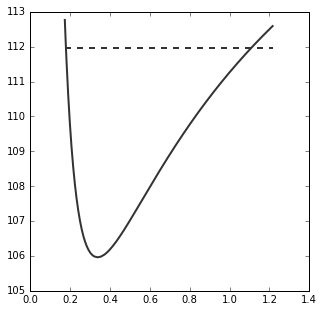

In [7]:
threshold=chi2.ppf(0.95,2)
f, ax =plt.subplots()
plt.rcParams['figure.figsize'] = 5,5
#plt.semilogx(RhoS,PLrhoS,linewidth=2,c='0.2')
plt.plot([PLb1['Parameters'][1,0],PLb1['Parameters'][1,-1]],[np.min(PLb1['Profile_Likelihood'])+threshold,np.min(PLb1['Profile_Likelihood'])+threshold],'--',c='0.2',linewidth=2)
plt.plot(PLb1['Parameters'][1],PLb1['Profile_Likelihood'],'-',c='0.2',linewidth=2)

In [13]:
reload(PL)
PLrhoC = PL.Compute_Profile(np.array([rhoC,deltaCB,rhoB,b2]),
                            0,
                            EM.logLikelihood_ProportionalError,
                            (DMSO_data[1:,:duration], SCBe.TB, t, [DMSO_data[1,0],0,0], np.array([rhoS,deltaSC])),
                            ((None,None),(0,None),(None,None),(0,None)),
                            target_sample_size=20,
                            max_sample_size=200,
                            d_par_init=0.1,
                            max_step=3)

Computing point #0 of the profile
Computing point #1 of the profile
Computing point #2 of the profile
Computing point #3 of the profile
Computing point #4 of the profile
Computing point #5 of the profile
Computing point #6 of the profile
Computing point #7 of the profile
Computing point #8 of the profile
Computing point #9 of the profile
Computing point #10 of the profile
Computing point #11 of the profile
Computing point #12 of the profile
Computing point #13 of the profile
Computing point #14 of the profile
Computing point #15 of the profile
Computing point #16 of the profile
Computing point #17 of the profile
Computing point #18 of the profile
Computing point #19 of the profile
Computing point #20 of the profile
Computing point #21 of the profile
Computing point #22 of the profile
Computing point #23 of the profile
Computing point #24 of the profile
Computing point #25 of the profile
Computing point #26 of the profile
Computing point #27 of the profile
Computing point #28 of the pro

In [8]:
save=False
if save:
    data=np.vstack((PLrhoC['Parameters'],PLrhoC['Profile_Likelihood']))
    np.savetxt('../data/03_Identifiability_Analysis/rhoC_%id.profile'%(duration-1),data)

load=True
if load:
    data=np.genfromtxt('../data/03_Identifiability_Analysis/rhoC_%id.profile'%(duration-1))
    PLrhoC={'Parameters':data[:-1],'Profile_Likelihood':data[-1]}

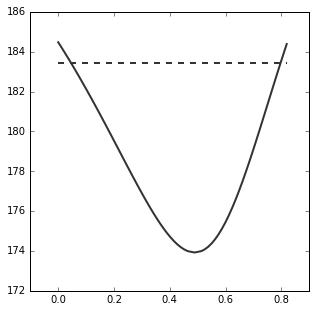

In [15]:
threshold=chi2.ppf(0.95,4)
plt.rcParams['figure.figsize'] = 5,5
#plt.semilogx(RhoS,PLrhoS,linewidth=2,c='0.2')
plt.plot([PLrhoC['Parameters'][0,0],PLrhoC['Parameters'][0,-1]],[np.min(PLrhoC['Profile_Likelihood'])+threshold,np.min(PLrhoC['Profile_Likelihood'])+threshold],'--',c='0.2',linewidth=2)
plt.plot(PLrhoC['Parameters'][0],PLrhoC['Profile_Likelihood'],'-',c='0.2',linewidth=2)

In [16]:
PLdeltaCB = PL.Compute_Profile(np.array([rhoC,deltaCB,rhoB,b2]),
                            1,
                            EM.logLikelihood_ProportionalError,
                            (DMSO_data[1:,:duration], SCBe.TB, t, [DMSO_data[1,0],0,0], np.array([rhoS,deltaSC])),
                            ((None,None),(0,None),(None,None),(0,None)),
                            target_sample_size=20,
                            max_sample_size=200,
                            d_par_init=0.1,
                            max_step=3)

Computing point #0 of the profile
Computing point #1 of the profile
Computing point #2 of the profile
Computing point #3 of the profile
Computing point #4 of the profile
Computing point #5 of the profile
Computing point #6 of the profile
Computing point #7 of the profile
Computing point #8 of the profile
Computing point #9 of the profile
Computing point #10 of the profile
Computing point #11 of the profile
Computing point #12 of the profile
Computing point #13 of the profile
Computing point #14 of the profile
Computing point #15 of the profile
Computing point #16 of the profile
Computing point #17 of the profile
Computing point #18 of the profile
Computing point #19 of the profile
Computing point #20 of the profile
Computing point #21 of the profile
Computing point #22 of the profile
Computing point #23 of the profile
Computing point #24 of the profile
Computing point #25 of the profile
Computing point #26 of the profile
Computing point #27 of the profile
Computing point #0 of the prof

In [9]:
save=False
if save:
    data=np.vstack((PLdeltaCB['Parameters'],PLdeltaCB['Profile_Likelihood']))
    np.savetxt('../data/03_Identifiability_Analysis/deltaCB_%id.profile'%(duration-1),data)

load=True
if load:
    data=np.genfromtxt('../data/03_Identifiability_Analysis/deltaCB_%id.profile'%(duration-1))
    PLdeltaCB={'Parameters':data[:-1],'Profile_Likelihood':data[-1]}

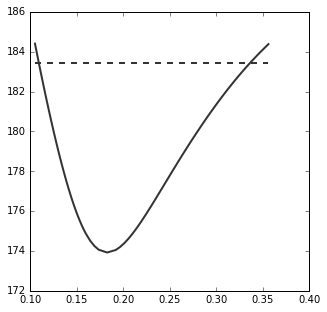

In [10]:
threshold=chi2.ppf(0.95,4)
plt.rcParams['figure.figsize'] = 5,5
#plt.semilogx(RhoS,PLrhoS,linewidth=2,c='0.2')
plt.plot([PLdeltaCB['Parameters'][1,0],PLdeltaCB['Parameters'][1,-1]],[np.min(PLdeltaCB['Profile_Likelihood'])+threshold,np.min(PLdeltaCB['Profile_Likelihood'])+threshold],'--',c='0.2',linewidth=2)
plt.plot(PLdeltaCB['Parameters'][1],PLdeltaCB['Profile_Likelihood'],'-',c='0.2',linewidth=2)

In [19]:
PLrhoB = PL.Compute_Profile(np.array([rhoC,deltaCB,rhoB,b2]),
                            2,
                            EM.logLikelihood_ProportionalError,
                            (DMSO_data[1:,:duration], SCBe.TB, t, [DMSO_data[1,0],0,0], np.array([rhoS,deltaSC])),
                            ((None,None),(0,None),(None,None),(0,None)),
                            target_sample_size=20,
                            max_sample_size=200,
                            d_par_init=0.1,
                            max_step=3)

Computing point #0 of the profile
Computing point #1 of the profile
Computing point #2 of the profile
Computing point #3 of the profile
Computing point #4 of the profile
Computing point #5 of the profile
Computing point #6 of the profile
Computing point #7 of the profile
Computing point #8 of the profile
Computing point #9 of the profile
Computing point #10 of the profile
Computing point #11 of the profile
Computing point #12 of the profile
Computing point #13 of the profile
Computing point #14 of the profile
Computing point #15 of the profile
Computing point #16 of the profile
Computing point #17 of the profile
Computing point #18 of the profile
Computing point #19 of the profile
Computing point #20 of the profile
Computing point #21 of the profile
Computing point #22 of the profile
Computing point #23 of the profile
Computing point #24 of the profile
Computing point #25 of the profile
Computing point #26 of the profile
Computing point #27 of the profile
Computing point #28 of the pro

In [16]:
save=False
if save:
    data=np.vstack((PLrhoB['Parameters'],PLrhoB['Profile_Likelihood']))
    np.savetxt('../data/03_Identifiability_Analysis/rhoB_%id.profile'%(duration-1),data)

load=True
if load:
    data=np.genfromtxt('../data/03_Identifiability_Analysis/rhoB_%id.profile'%(duration-1))
    PLrhoB={'Parameters':data[:-1],'Profile_Likelihood':data[-1]}

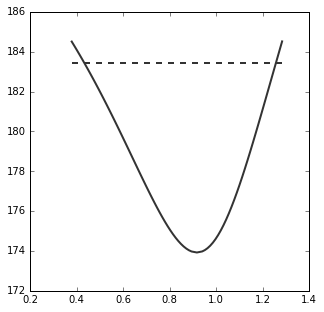

In [17]:
threshold=chi2.ppf(0.95,4)
plt.rcParams['figure.figsize'] = 5,5
plt.plot([PLrhoB['Parameters'][2,0],PLrhoB['Parameters'][2,-1]],[np.min(PLrhoB['Profile_Likelihood'])+threshold,np.min(PLrhoB['Profile_Likelihood'])+threshold],'--',c='0.2',linewidth=2)
plt.plot(PLrhoB['Parameters'][2],PLrhoB['Profile_Likelihood'],'-',c='0.2',linewidth=2)

In [22]:
PLb2 = PL.Compute_Profile(np.array([rhoC,deltaCB,rhoB,b2]),
                            3,
                            EM.logLikelihood_ProportionalError,
                            (DMSO_data[1:,:duration], SCBe.TB, t, [DMSO_data[1,0],0,0], np.array([rhoS,deltaSC])),
                            ((None,None),(0,None),(None,None),(0,None)),
                            target_sample_size=20,
                            max_sample_size=200,
                            d_par_init=0.1,
                            max_step=3)

Computing point #0 of the profile
Computing point #1 of the profile
Computing point #2 of the profile
Computing point #3 of the profile
Computing point #4 of the profile
Computing point #5 of the profile
Computing point #6 of the profile
Computing point #7 of the profile
Computing point #8 of the profile
Computing point #9 of the profile
Computing point #10 of the profile
Computing point #11 of the profile
Computing point #12 of the profile
Computing point #13 of the profile
Computing point #14 of the profile
Computing point #15 of the profile
Computing point #16 of the profile
Computing point #17 of the profile
Computing point #18 of the profile
Computing point #19 of the profile
Computing point #20 of the profile
Computing point #21 of the profile
Computing point #22 of the profile
Computing point #0 of the profile
Computing point #1 of the profile
Computing point #2 of the profile
Computing point #3 of the profile
Computing point #4 of the profile
Computing point #5 of the profile
C

In [13]:
save=False
if save:
    data=np.vstack((PLb2['Parameters'],PLb2['Profile_Likelihood']))
    np.savetxt('../data/03_Identifiability_Analysis/b2_%id.profile'%(duration-1),data)

load=True
if load:
    data=np.genfromtxt('../data/03_Identifiability_Analysis/b2_%id.profile'%(duration-1))
    PLb2={'Parameters':data[:-1],'Profile_Likelihood':data[-1]}

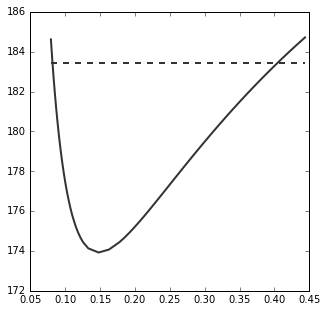

In [14]:
threshold=chi2.ppf(0.95,4)
plt.rcParams['figure.figsize'] = 5,5
#plt.semilogx(RhoS,PLrhoS,linewidth=2,c='0.2')
plt.plot([PLb2['Parameters'][3,0],PLb2['Parameters'][3,-1]],[np.min(PLb2['Profile_Likelihood'])+threshold,np.min(PLb2['Profile_Likelihood'])+threshold],'--',c='0.2',linewidth=2)
plt.plot(PLb2['Parameters'][3],PLb2['Profile_Likelihood'],'-',c='0.2',linewidth=2)

# Confidence Intervals

In [18]:
xlabels=(r'$\rho_S$',r'$b_1$',r'$\rho_C$',r'$\delta_{CB}$',r'$\rho_B$',r'$b_2$')

CIrhoS = PL.Confidence_Interval(PLrhoS, 0)
CIb1 = PL.Confidence_Interval(PLb1, 1)
CIrhoC = PL.Confidence_Interval(PLrhoC, 0)
CIdeltaCB = PL.Confidence_Interval(PLdeltaCB, 1)
CIrhoB = PL.Confidence_Interval(PLrhoB, 2)
CIb2 = PL.Confidence_Interval(PLb2, 3)

optimal_values=(rhoS, b1, rhoC, deltaCB, rhoB, b2)
CI=(CIrhoS, CIb1, CIrhoC, CIdeltaCB, CIrhoB, CIb2)

print('Parameter:\tLower Bound:\tOptimal Value:\tUpper Bound:')
print('----------\t------------\t--------------\t------------\n')
for i in range(6):
    line=''
    line+='%s\t'%xlabels[i]
    if i in (1,5):
        line+='\t'
    line+='%.4g\t\t%.4g\t\t%.4g'%(CI[i][0], optimal_values[i], CI[i][1])
    print(line)

Parameter:	Lower Bound:	Optimal Value:	Upper Bound:
----------	------------	--------------	------------

$\rho_S$	0.3494		0.5274		0.6989
$b_1$		0.1773		0.3377		1.106
$\rho_C$	0.04889		0.4889		0.7945
$\delta_{CB}$	0.1096		0.1826		0.3378
$\rho_B$	0.4353		0.9164		1.26
$b_2$		0.08136		0.1479		0.4068


/Users/rduchesn/Library/Python/3.5/lib/python/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/rduchesn/Library/Python/3.5/lib/python/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['DejaVu Sans'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/rduchesn/Library/Python/3.5/lib/python/site-packages/matplotlib/mathtext.py:857: MathTextWarning: Substituting with a symbol from Computer Modern.
  MathTextWarning)


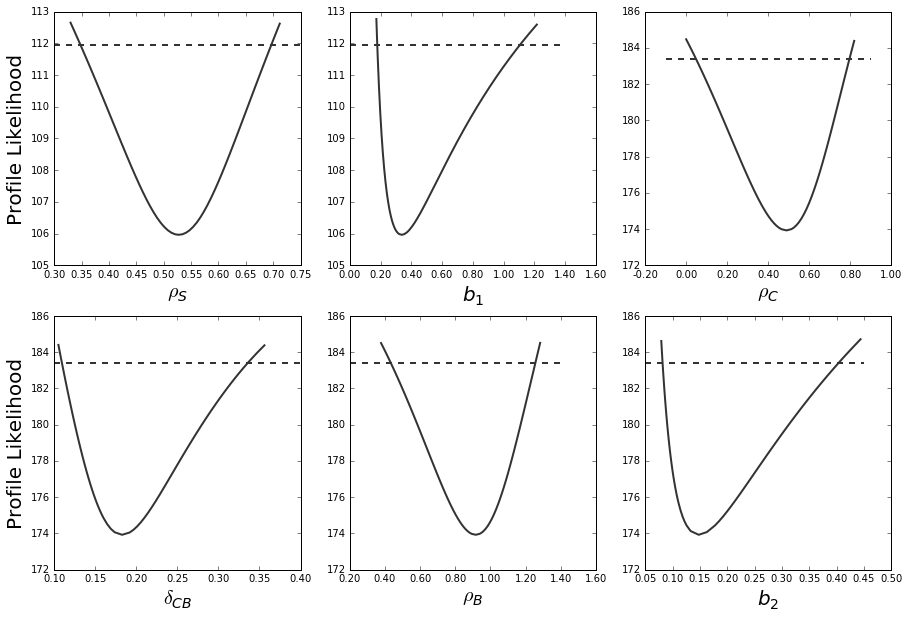

In [19]:
plt.rcParams['figure.figsize'] = 15,10
f,ax=plt.subplots(2,3)


Profiles=[PLrhoS,PLb1,PLrhoC,PLdeltaCB,PLrhoB,PLb2]
index=(0,1,0,1,2,3)
thresh1=chi2.ppf(0.95,2)
thresh2=chi2.ppf(0.95,4)
threshold=(thresh1,thresh1,thresh2,thresh2,thresh2,thresh2)

for i in range(2):
    for j in range(3):
        k=3*i+j
        data=Profiles[k]
        ax[i,j].plot(data['Parameters'][index[k]],data['Profile_Likelihood'],'-',c='0.2',linewidth=2)
        #ax[i,j].set_xlim(0.9*data['Parameters'][index[k],0],1.1*data['Parameters'][index[k],-1])
        ax[i,j].plot(ax[i,j].get_xlim(),[np.min(data['Profile_Likelihood'])+threshold[k], np.min(data['Profile_Likelihood'])+threshold[k]], '--', c='0.2', linewidth=2)
        ax[i,j].set_xlabel(xlabels[k],fontsize=20)
        #ax[i,j].set_xticks((CI[k][0], optimal_values[k], CI[k][1]))
        ax[i,j].xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax[i,0].set_ylabel('Profile Likelihood',fontsize=20)

savefig=False
if savefig:
    plt.savefig('../figures/03_Identifiability_Analysis/Profiles_%id.pdf'%(duration-1),dpi='figure',bbox_inches='tight')